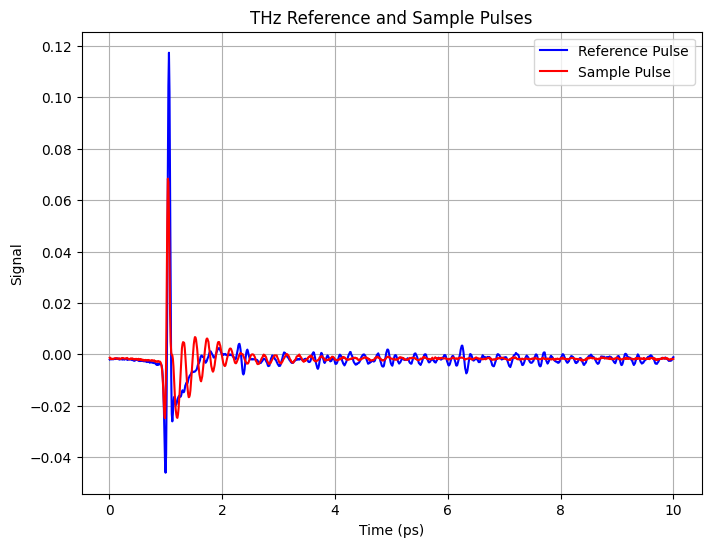

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Relative data folder to the raw data
data_folder = os.path.join("..", "data")

# File paths for Reference and Sample
reference_file = os.path.join(data_folder, "Reference.d24")
sample_file = os.path.join(data_folder, "Sample.d24")

# Check if both files exist
if not os.path.exists(reference_file):
    raise FileNotFoundError(f"File 'Reference.d24' not found in the 'data' folder.")
if not os.path.exists(sample_file):
    raise FileNotFoundError(f"File 'Sample.d24' not found in the 'data' folder.")

# Function to read and process a .d24 file
def read_d24_file(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    start_line = next(i for i, line in enumerate(lines) if line.lstrip()[0].isdigit())
    data_lines = lines[start_line:]
    return pd.DataFrame(
        [list(map(float, line.split())) for line in data_lines],
        columns=["Time (ps)", "Signal", "Column3", "Column4", "Column5"]
    )[["Time (ps)", "Signal"]]

# Read data from Reference and Sample files
reference_data = read_d24_file(reference_file)
sample_data = read_d24_file(sample_file)


# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(reference_data["Time (ps)"], reference_data["Signal"], label="Reference Pulse", color='blue')
plt.plot(sample_data["Time (ps)"], sample_data["Signal"], label="Sample Pulse", color='red')
plt.title("THz Reference and Sample Pulses")
plt.xlabel("Time (ps)")
plt.ylabel("Signal")
plt.grid(True)
plt.legend()
plt.show()
